**Data:** This data has total of 10 subjects and which has 23 input variables and one target variable.The goal of this project is to predict the activity of a person based on data given by the sensors. There are 23 input variables, which are the data collected from the sensors and the target variable is multi class which is activity. There are total of 13 class in the target variable.

**Data Preparation:** There are 10 different files so i will merge all the files and preprocess the data. So i am going to do this in 3 different approaches so for each approach i will prepare the data accordingly 

**Approach:** So my approch was to try this in 3 different ways, 
- First was by building basic classifiers Xg Boost and Randomforest and will see how they are performing and also will look into feature importance plot and check whether any variables are useless.
- Second approch was to treat this as multi target instead of multi class.So i will convert each class as a different target variable and build a Sklearn inbuilt one vs rest classifier and see how it is performing .
- My Third approach was similar to second but instead of one vs rest inbuit sklearn classifier, i will build a single model for each class which means there are 13 classes in the data so i will build 13 model(one for each class) and to predict the class of the test data, i will pass every record to all 13 classifiers and i will predict the probabilities. so which ever class model gives the highest probability it will belongs to that class.


In [30]:
## Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

In [2]:
## Loading data all 10 subjects 
sub1 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject1.log',sep='\t',header=None)

sub2 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject2.log',sep='\t',header=None)

sub3 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject3.log',sep='\t',header=None)

sub4 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject4.log',sep='\t',header=None)

sub5 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject5.log',sep='\t',header=None)

sub6 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject6.log',sep='\t',header=None)

sub7 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject7.log',sep='\t',header=None)

sub8 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject8.log',sep='\t',header=None)

sub9 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject9.log',sep='\t',header=None)

sub10 = pd.read_csv('/kaggle/input/mhealth-dataset-data-set/MHEALTHDATASET/mHealth_subject10.log',sep='\t',header=None)


In [3]:
## Merging all 10 subjects data
data = pd.concat([sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10], axis=0, ignore_index=True)

In [4]:
## Column names
columns=['acc_chest_x','acc_chest_y','acc_chest_z','ecg_1','ecg_2','acc_ankel_x','acc_ankel_y','acc_ankel_z','gyro_ankel_x',
        'gyro_ankel_y','gyro_ankel_z','mag_ankel_x','mag_ankel_y','mag_ankel_z','acc_arm_x','acc_arm_y','acc_arm_z',
         'gyro_arm_x','gyro_arm_y','gyro_arm_z','mag_arm_x','mag_arm_y','mag_arm_z','label']

In [5]:
## Renaming columns
data.columns=columns

In [7]:
data.head()

,acc_chest_x,acc_chest_y,acc_chest_z,ecg_1,ecg_2,acc_ankel_x,acc_ankel_y,acc_ankel_z,gyro_ankel_x,gyro_ankel_y,...,acc_arm_x,acc_arm_y,acc_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,mag_arm_x,mag_arm_y,mag_arm_z,label
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0


In [75]:
## dimension of data
data.shape

(1215745, 24)

In [76]:
## Traget variable distribution
data.label.value_counts()

0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: label, dtype: int64

In [10]:
## Null values
data.isna().sum().sum()

0

In [247]:
data.describe()

,acc_chest_x,acc_chest_y,acc_chest_z,ecg_1,ecg_2,acc_ankel_x,acc_ankel_y,acc_ankel_z,gyro_ankel_x,gyro_ankel_y,...,acc_arm_x,acc_arm_y,acc_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,mag_arm_x,mag_arm_y,mag_arm_z,label
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,...,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,-8.522361e+00,-2.140013e-01,-1.055950e+00,-5.122403e-03,-4.506434e-03,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,...,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.702138e-01,7.144626e-01,-3.668126e-01,1.741465e+00
std,4.075293e+00,2.138954e+00,3.574163e+00,7.465971e-01,7.270395e-01,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,...,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,2.667617e+01,3.344453e+01,6.955069e+01,3.283679e+00
min,-2.243800e+01,-2.018800e+01,-1.840100e+01,-8.619600e+00,-8.619600e+00,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,...,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,-3.190300e+02,-3.639000e+02,-7.175500e+02,0.000000e+00
25%,-9.804000e+00,-1.272900e+00,-2.867300e+00,-2.344300e-01,-1.883800e-01,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,...,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,-6.191900e+00,-9.519500e+00,-1.423800e+01,0.000000e+00
50%,-9.311400e+00,-3.538100e-01,-8.702000e-01,-7.116700e-02,-4.186300e-02,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,...,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,3.626200e-01,3.521700e-01,-6.729600e-01,0.000000e+00
75%,-7.637100e+00,7.097800e-01,7.259100e-01,1.590800e-01,1.507100e-01,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,...,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,6.792300e+00,1.007600e+01,1.318600e+01,2.000000e+00
max,1.909400e+01,2.092700e+01,2.619600e+01,8.514900e+00,8.519100e+00,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,...,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,2.511500e+02,3.377600e+02,6.571800e+02,1.200000e+01


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 24 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   acc_chest_x   1215745 non-null  float64
 1   acc_chest_y   1215745 non-null  float64
 2   acc_chest_z   1215745 non-null  float64
 3   ecg_1         1215745 non-null  float64
 4   ecg_2         1215745 non-null  float64
 5   acc_ankel_x   1215745 non-null  float64
 6   acc_ankel_y   1215745 non-null  float64
 7   acc_ankel_z   1215745 non-null  float64
 8   gyro_ankel_x  1215745 non-null  float64
 9   gyro_ankel_y  1215745 non-null  float64
 10  gyro_ankel_z  1215745 non-null  float64
 11  mag_ankel_x   1215745 non-null  float64
 12  mag_ankel_y   1215745 non-null  float64
 13  mag_ankel_z   1215745 non-null  float64
 14  acc_arm_x     1215745 non-null  float64
 15  acc_arm_y     1215745 non-null  float64
 16  acc_arm_z     1215745 non-null  float64
 17  gyro_arm_x    1215745 non-n

In [6]:
## Input and target variable
x=data.drop('label',axis=1)
y=data.label

In [251]:
## Test, Train and validation split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.10, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=123)

# Approach 1: Building Xg bosst and Random Forest classifiers

So i am going to build Xg Boost and random forest and see how its performing, and comming to data preparation i have checked null values and any categorical variablles and dumping whole data into algorithms and see how it performance.Based on the feature importance plot will decide we have to drop any columns.

In [252]:
## Xg Boost Classifier
clf_xg=XGBClassifier(objective='multi:softmax',tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg.fit(X_train, y_train)  ## Fitting data


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [253]:
# Predict on train and validation set
y_train_pred = clf_xg.predict(X_train)
y_val_pred = clf_xg.predict(X_val)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train, y_train_pred))

Validation Accuracy : 0.9288090516098961
Train Accuracy : 0.9427397022400541


In [254]:
print(classification_report(y_val, y_val_pred))  ##Classification report

              precision    recall  f1-score   support

           0       0.96      0.94      0.95    157165
           1       0.85      0.96      0.90      5511
           2       0.83      0.96      0.89      5618
           3       0.86      0.98      0.91      5616
           4       0.83      0.88      0.86      5569
           5       0.88      0.78      0.83      5492
           6       0.86      0.90      0.88      5175
           7       0.83      0.94      0.88      5296
           8       0.84      0.88      0.86      5235
           9       0.85      0.95      0.89      5429
          10       0.84      0.92      0.88      5440
          11       0.85      0.93      0.89      5535
          12       0.79      0.73      0.76      1753

    accuracy                           0.93    218834
   macro avg       0.85      0.90      0.88    218834
weighted avg       0.93      0.93      0.93    218834



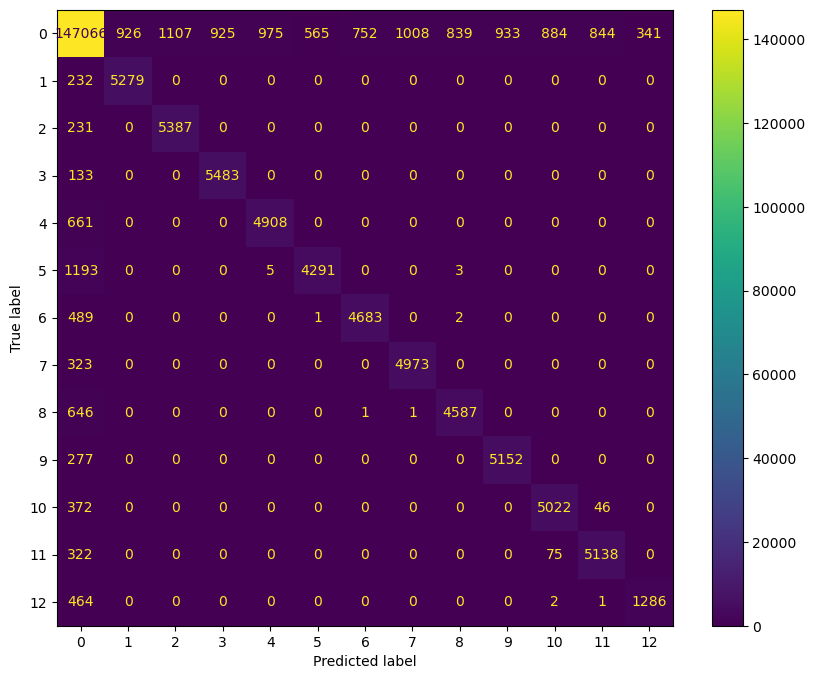

In [255]:
## Confusion metric
fig, ax = plt.subplots(figsize=(10,8))
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred,ax=ax)

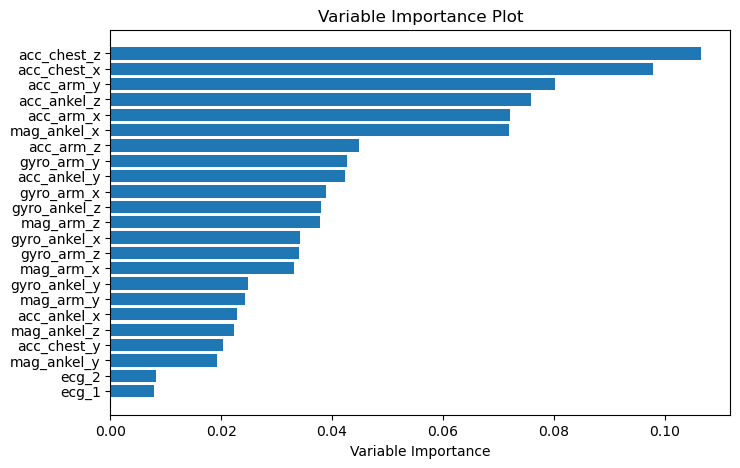

In [24]:
## Feature importance plot
importances = clf_xg.feature_importances_  ##Sort the feature importances
indices = np.argsort(importances)
# Plot the variable importance using horizontal bar plot
plt.figure(figsize=(8, 5))
plt.barh(range(len(X_train.columns)), importances[indices])
plt.yticks(range(len(X_train.columns)), [X_train.columns[i] for i in indices])
plt.xlabel('Variable Importance')
plt.title('Variable Importance Plot')
plt.show()

**Random Forest Classifier**

In [248]:
# Converting Input and target varibales to run random forest on gpu
x_cudf = cudf.from_pandas(x)  
y_cudf = cudf.from_pandas(y)
## Test train and validation
X_train_, X_test_, y_train_, y_test_ = train_test_split(x_cudf, y_cudf, test_size=0.10, random_state=42)
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size=0.20, random_state=42)
## Random forest classifier
clf_rf = RandomForestClassifier(random_state=123)  
clf_rf.fit(X_train_, y_train_)  ## fitting data

RandomForestClassifier()

In [249]:
# Predict on train and validation set
y_train_pred = clf_rf.predict(X_train_)  ## predictions
y_val_pred = clf_rf.predict(X_val_)
y_train_ = y_train_.to_pandas().to_numpy()  ##Converting data back
y_val_ = y_val_.to_pandas().to_numpy()
y_train_pred = y_train_pred.to_pandas().to_numpy()
y_val_pred = y_val_pred.to_pandas().to_numpy()
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_, y_train_pred))

Validation Accuracy : 0.8698648290485025
Train Accuracy : 0.8867417768719669


In [250]:
print(classification_report(y_val_, y_val_pred))  ## Classification report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91    157022
           1       0.79      0.91      0.85      5442
           2       0.79      0.98      0.87      5525
           3       0.83      0.99      0.90      5500
           4       0.87      0.27      0.41      5569
           5       0.98      0.15      0.26      5518
           6       0.85      0.57      0.69      5097
           7       0.81      0.75      0.78      5364
           8       0.88      0.41      0.56      5368
           9       0.82      0.86      0.84      5535
          10       0.85      0.81      0.83      5573
          11       0.83      0.92      0.87      5517
          12       0.88      0.25      0.39      1804

    accuracy                           0.87    218834
   macro avg       0.85      0.68      0.70    218834
weighted avg       0.87      0.87      0.85    218834



**SO Xg boost is performing better than random forest so we will now tune the xgboost using grid search and will see whether performance is increasing or not.**

#### Tunning Parameters
So Xg Boost is giving good results than randomforest with out tunning parameters so will fine tune xg Bosst 

In [87]:
## Classifier
clf_xg_main=XGBClassifier(n_estimators=500,objective='multi:softmax',tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_main.fit(X_train, y_train)  ## Fitting data
# Predict on train and validation set
y_train_pred = clf_xg_main.predict(X_train)
y_val_pred = clf_xg_main.predict(X_val)
y_test_pred = clf_xg_main.predict(X_test)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train, y_train_pred))
print('Test Accuracy :',accuracy_score(y_test, y_test_pred))

Validation Accuracy : 0.9686885950080883
Train Accuracy : 0.9998092161181534
Test Accuracy : 0.9686695455480157


- Ignore the below cell warning and best parameters are at the bottom after those warnings


In [26]:
## Classifier
clf=XGBClassifier(n_estimators=500,objective='multi:softmax',tree_method ='gpu_hist',gpu_id=0,random_state=123)  ## classifier
## Parameters for grid search
parameters = {'max_depth':[5,7,9],  ## search for maxdepth
              'learning_rate':[0.15,0.3,0.5,1,],  ##search for learning rate
              'subsample':[0.7,0.8,0.9]  ## Subsample
             }  ## search for max depth 
grid_search_main = GridSearchCV(clf, parameters, cv=3,scoring='f1',n_jobs=-1)  # Use 3-fold cross-validation
grid_search_main.fit(X_train, y_train) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_search_main.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/opt/conda/l

Best Parameters: {'learning_rate': 0.15, 'max_depth': 5, 'subsample': 0.7}


In [27]:
# Predict on train and validation set
y_train_pred = grid_search_main.predict(X_train)
y_val_pred = grid_search_main.predict(X_val)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train, y_train_pred))

Validation Accuracy : 0.9448440370326366
Train Accuracy : 0.9643359806976978


In [28]:
print(classification_report(y_val, y_val_pred))  ##Classification report

              precision    recall  f1-score   support

           0       0.98      0.95      0.96    157165
           1       0.89      0.96      0.92      5511
           2       0.85      0.95      0.89      5618
           3       0.87      0.97      0.92      5616
           4       0.86      0.93      0.89      5569
           5       0.92      0.88      0.90      5492
           6       0.89      0.94      0.92      5175
           7       0.87      0.96      0.91      5296
           8       0.88      0.93      0.91      5235
           9       0.88      0.96      0.92      5429
          10       0.86      0.95      0.90      5440
          11       0.86      0.94      0.90      5535
          12       0.83      0.80      0.82      1753

    accuracy                           0.94    218834
   macro avg       0.88      0.93      0.90    218834
weighted avg       0.95      0.94      0.95    218834



## Test data prediction

In [29]:
## Predictions and score
y_test_pred = grid_search_main.predict(X_test)
print(classification_report(y_test, y_test_pred))  ##Classification report

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     87172
           1       0.88      0.96      0.92      3076
           2       0.84      0.95      0.90      3065
           3       0.86      0.98      0.92      3141
           4       0.85      0.94      0.89      3092
           5       0.92      0.88      0.90      3072
           6       0.89      0.95      0.92      2725
           7       0.88      0.96      0.92      3046
           8       0.88      0.94      0.91      2926
           9       0.87      0.96      0.91      3105
          10       0.86      0.95      0.90      3112
          11       0.87      0.94      0.91      3054
          12       0.83      0.80      0.81       989

    accuracy                           0.94    121575
   macro avg       0.88      0.94      0.90    121575
weighted avg       0.95      0.94      0.95    121575



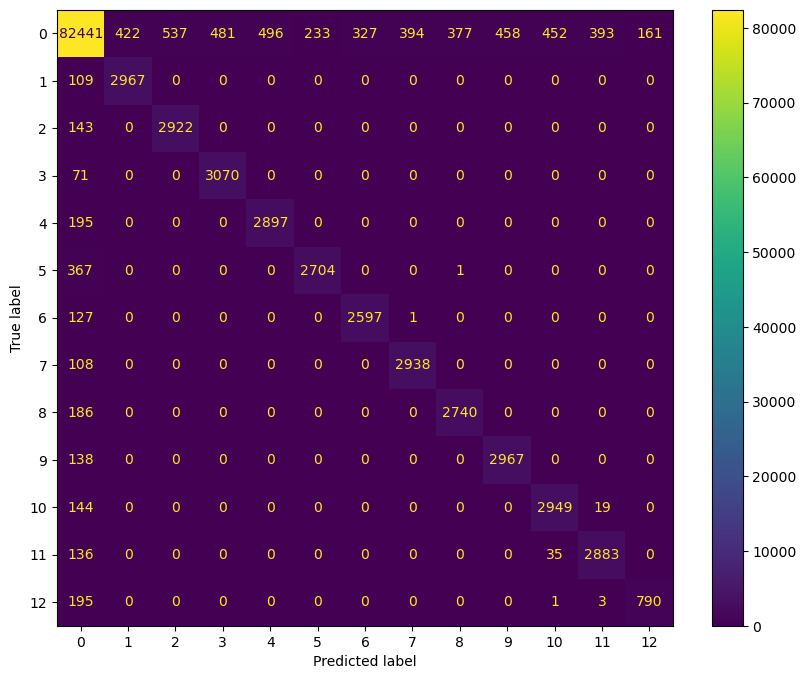

In [32]:
## Confusion metric
fig, ax = plt.subplots(figsize=(10,8))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,ax=ax)

After tunning parameters of the XG Boost model performance has increased from accuracy of 92 % to 96% and also train and validation accuracy of the model are close to each other which means our model is generalised.

# Approach 2: One VS Rest Classifier (Sklearn) 
Now i will build sklean one vs rest classifier. So for one vs rest classifier i am using base classifier as xgBoost and comming to data preparation i have converted the target variable as 13 different varibles one for each class (consider as one hot encoding) now i will treat each class as different target variable and build the one vs rest.

**Evaluation metric:** I have used zero-one loss as the evaluation metric. The zero-one loss ranges from 0 to 100. If zero-one  loss is 0 then our accuracy is 100 % which means all the target variables are correctly classified, if zeo-one loss is 100% means our accuracy of the model is 0 % which means none of the sample are correctly classified.

In [33]:
## Copying data
data_dup = data.copy()

In [34]:
## converting data type
data_dup['label'] = data_dup['label'].astype(object)

In [35]:
## Converting target variable into 13 different variable(one for each class)
new_data=pd.get_dummies(data_dup)
new_data.head()

,acc_chest_x,acc_chest_y,acc_chest_z,ecg_1,ecg_2,acc_ankel_x,acc_ankel_y,acc_ankel_z,gyro_ankel_x,gyro_ankel_y,...,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label_10,label_11,label_12
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,0,0,0,0,0,0,0,0,0,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,0,0,0,0,0,0,0,0,0,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,0,0,0,0,0,0,0,0,0,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,0,0,0,0,0,0,0,0,0,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,0,0,0,0,0,0,0,0,0,0


In [36]:
## Input and target variables
x_new=new_data.drop(new_data.columns[-13:], axis=1)
y_new=new_data.iloc[:, -13:]

In [37]:
## Target variables
y_new.head()

,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label_10,label_11,label_12
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
## Splitting data into test, train and validation
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new,test_size=0.10, random_state=123)
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_train_new, y_train_new, test_size=0.20, random_state=123)

In [51]:
## One Vs rest classifier
clf = XGBClassifier(n_estimators=500,learning_rate=0.3,max_depth=6,tree_method ='gpu_hist',gpu_id=0,random_state=123) ## Base Classifier
ovr = OneVsRestClassifier(clf)  ## SK Learn One vs Rest
ovr.fit(X_train_new, y_train_new)  ## Fitting data 

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=0, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=123, ...))

In [52]:
## Score
pred_val = pd.DataFrame(ovr.predict(X_val_new))  ## Predictions 
pred_train=pd.DataFrame(ovr.predict(X_train_new))
print('Validation Loss:',zero_one_loss(y_val_new, pred_val))  ## Zero one loss of Train and validation
print('Train Loss:',zero_one_loss(y_train_new, pred_train))

Validation Loss: 0.07382765018232995
Train Loss: 0.04701280422603438


In [53]:
## Classification report
print(classification_report(y_val_new, pred_val))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95    157165
           1       0.92      0.95      0.94      5511
           2       0.86      0.93      0.89      5618
           3       0.88      0.95      0.91      5616
           4       0.92      0.97      0.94      5569
           5       0.98      0.97      0.98      5492
           6       0.97      0.98      0.98      5175
           7       0.93      0.98      0.95      5296
           8       0.96      0.98      0.97      5235
           9       0.92      0.98      0.95      5429
          10       0.90      0.96      0.93      5440
          11       0.90      0.95      0.93      5535
          12       0.89      0.87      0.88      1753

   micro avg       0.95      0.95      0.95    218834
   macro avg       0.92      0.95      0.94    218834
weighted avg       0.96      0.95      0.95    218834
 samples avg       0.94      0.95      0.94    218834



## Test data Predictions

In [256]:
## Predictions and score
pred_test = pd.DataFrame(ovr.predict(X_test_new))
print('Test Loss:',zero_one_loss(y_test_new, pred_test))

Test Loss: 0.07287682500514081


In [55]:
## Classification report
print(classification_report(y_test_new, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     87172
           1       0.91      0.96      0.94      3076
           2       0.86      0.93      0.90      3065
           3       0.88      0.96      0.92      3141
           4       0.92      0.96      0.94      3092
           5       0.98      0.98      0.98      3072
           6       0.96      0.98      0.97      2725
           7       0.94      0.98      0.96      3046
           8       0.96      0.98      0.97      2926
           9       0.92      0.97      0.95      3105
          10       0.90      0.95      0.92      3112
          11       0.92      0.95      0.93      3054
          12       0.89      0.86      0.88       989

   micro avg       0.96      0.95      0.95    121575
   macro avg       0.92      0.96      0.94    121575
weighted avg       0.96      0.95      0.95    121575
 samples avg       0.94      0.95      0.94    121575



As we can see our zero one loss of this is model is 0.07 which means our model accuracy is 99%. and also if we look at the f1 score precision and recall of this model is almost close 96 %. Which means this model is doing a great job.

# Approach 3: One Vs Rest Classifier(Buildng separate model for each class)
Now i will build 13 different models one foe each class. So i have sub sample data for each model let us consider class 0 so for class 0, i have created a sample of all 0 class data and mix of few records of all other classes. Now i have converted the class 0 label as 1 and rest of the labels as 0 which means 50 % of the records will be class 0 records and the rest 50 % of the records will rest 12 classes records. So this data will goes into class 0 model. Like this i have created sample data for all 13 classes and built a induvidual model.

**Predictions and Evaluation:** So predict the test data i will be passing each sample into all 13 models and i will predict the probabilites which class model has the highest probability it will belongs to that class. So for Evaluation i have used same f1 score, precision and recall.

In [138]:
## Separating test and train
train, test = train_test_split(data, test_size=0.15, stratify=data['label'], random_state=123)
train, val = train_test_split(train, test_size=0.10, stratify=train['label'], random_state=123)

In [57]:
def Data_Sample(Label,data):
    '''Function which takes label number and data frame as input and returns the sample data'''
    
    if Label==0:  ## If label is 0
        d=data[data.label==Label].sample(n=75000)  ##random 75000 label 0 observations
        for i in range(1,13):  ##Iterating to get sample data of each label
            dup=data[data.label==i].sample(n=7500)  ##For label 1 to 12 we are taking 7500 random samples 
            d=pd.concat([d,dup],axis=0, ignore_index=True)  ##concatinating all data
    else:  ##if label not equal =0
        d=data[data.label==Label]  ##extracting all label information given by user
        for i in range(13):  ##Iterating to get sample data of rest of label
            if i!= Label:  ## sampling
                if i==0:
                    dup=data[data.label==i].sample(n=6000)  ##for class 6000 random samples
                if i!=0:
                    dup=data[data.label==i].sample(n=4000) ## for rest of classes 4000 random samples

            d=pd.concat([d,dup],axis=0, ignore_index=True)  ##concatinating all data
    return d  ## returning data

**Model for Class 0**

In [139]:
## Creating data for class 0 
data_0=Data_Sample(0,train)  ## Helper function to generate sample data foe class 0
data_0.label.replace(0,'positive',inplace=True)  ##replacing lable 0 as positive
data_0.label.replace([1,2,3,4,5,6,7,8,9,10,11,12],0,inplace=True)  ## replacing other lables as 0
data_0.label.replace('positive',1,inplace=True)  ## replacing 0 as 1 
## Input and target variables
x_0=data_0.drop('label',axis=1)
y_0=data_0.label
## Test validation split
X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(x_0, y_0,test_size=0.20, random_state=123)

In [140]:
## classifier for class 0
clf_xg_0=XGBClassifier(n_estimators=500,tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_0.fit(X_train_0, y_train_0)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [141]:
# Predict on train and validation set
y_train_pred = clf_xg_0.predict(X_train_0)
y_val_pred = clf_xg_0.predict(X_val_0)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_0, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_0, y_train_pred))
## classification report
print(classification_report(y_val_pred, y_val_0))

Validation Accuracy : 0.9273333333333333
Train Accuracy : 0.9841060606060607
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     19255
           1       0.88      0.96      0.92     13745

    accuracy                           0.93     33000
   macro avg       0.92      0.93      0.93     33000
weighted avg       0.93      0.93      0.93     33000



**Model for class1**

In [142]:
## Creating data for class 0 
data_1=Data_Sample(1,data)  ##Helper function to generate sample data for class 1
data_1.label.replace([2,3,4,5,6,7,8,9,10,11,12],0,inplace=True)  ## replacing other lables as 0
## Input and target variables
x_1=data_1.drop('label',axis=1)
y_1=data_1.label
## Test validation split
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(x_1, y_1,test_size=0.20, random_state=123)

In [143]:
## class 1 model
clf_xg_1=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_1.fit(X_train_1, y_train_1)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [144]:
# Predict on train and validation set
y_train_pred = clf_xg_1.predict(X_train_1)
y_val_pred = clf_xg_1.predict(X_val_1)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_1, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_1, y_train_pred))
print(classification_report(y_val_pred, y_val_1))

Validation Accuracy : 0.9993081180811808
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11097
           1       1.00      1.00      1.00      6247

    accuracy                           1.00     17344
   macro avg       1.00      1.00      1.00     17344
weighted avg       1.00      1.00      1.00     17344



**Model for class 2**

In [145]:
data_2=Data_Sample(2,data)  ##Helper function to generate sample data for class 2
data_2.label.replace([0,1,3,4,5,6,7,8,9,10,11,12],0,inplace=True)  ## replacing other lables as 0
data_2.label.replace(2,1,inplace=True)  ## replacing lable2 as 1
##Input and target
x_2=data_2.drop('label',axis=1)
y_2=data_2.label
## Train and validation
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(x_2, y_2,test_size=0.10, random_state=123)

In [146]:
## Class 2 model
clf_xg_2=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_2.fit(X_train_2, y_train_2)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [147]:
# Predict on train and validation set
y_train_pred = clf_xg_2.predict(X_train_2)
y_val_pred = clf_xg_2.predict(X_val_2)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_2, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_2, y_train_pred))
print(classification_report(y_val_pred, y_val_2))

Validation Accuracy : 0.9981114258734656
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5351
           1       1.00      0.99      1.00      3121

    accuracy                           1.00      8472
   macro avg       1.00      1.00      1.00      8472
weighted avg       1.00      1.00      1.00      8472



**Model for class 3**

In [148]:
data_3=Data_Sample(3,data)  ##Helper function to generate sample data for class 3
data_3.label.replace([0,1,2,4,5,6,7,8,9,10,11,12],0,inplace=True)  ## replacing other lables as 0
data_3.label.replace(3,1,inplace=True)  ## replacing lable 3 as 1
## Input and target
x_3=data_3.drop('label',axis=1)
y_3=data_3.label
## Train and validation
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(x_3, y_3,test_size=0.20, random_state=123)

In [149]:
## class 3 model
clf_xg_3=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_3.fit(X_train_3, y_train_3) ## fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [150]:
# Predict on train and validation set
y_train_pred = clf_xg_3.predict(X_train_3)
y_val_pred = clf_xg_3.predict(X_val_3)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_3, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_3, y_train_pred))
print(classification_report(y_val_pred, y_val_3))

Validation Accuracy : 0.9989966949952785
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10697
           1       1.00      1.00      1.00      6247

    accuracy                           1.00     16944
   macro avg       1.00      1.00      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Model for class 4**

In [151]:
data_4=Data_Sample(4,data)  ##Helper function to generate sample data for class 4
data_4.label.replace([0,1,2,3,5,6,7,8,9,10,11,12],0,inplace=True)  ## replacing other lables as 0
data_4.label.replace(4,1,inplace=True)  ## replacing  lable 4 as 1
## Input and target
x_4=data_4.drop('label',axis=1)
y_4=data_4.label
## Train and validation
X_train_4, X_val_4, y_train_4, y_val_4 = train_test_split(x_4, y_4,test_size=0.20, random_state=123)

In [152]:
## Class 4 model
clf_xg_4=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_4.fit(X_train_4, y_train_4)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [153]:
# Predict on train and validation set
y_train_pred = clf_xg_4.predict(X_train_4)
y_val_pred = clf_xg_4.predict(X_val_4)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_4, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_4, y_train_pred))
print(classification_report(y_val_pred, y_val_4))

Validation Accuracy : 0.9961048158640227
Train Accuracy : 0.9999114730878187
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10654
           1       1.00      0.99      0.99      6290

    accuracy                           1.00     16944
   macro avg       1.00      0.99      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Model for class 5**

In [154]:
data_5=Data_Sample(5,data)  ##Helper function to generate sample data for class 5
data_5.label.replace([0,1,2,3,4,6,7,8,9,10,11,12],0,inplace=True)  ## replacing other lables as 0
data_5.label.replace(5,1,inplace=True)  ## replacing lable 5 as 1
## Input and target
x_5=data_5.drop('label',axis=1)
y_5=data_5.label
##Train and validation
X_train_5, X_val_5, y_train_5, y_val_5 = train_test_split(x_5, y_5,test_size=0.20, random_state=123)

In [155]:
## class 5 Model
clf_xg_5=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_5.fit(X_train_5, y_train_5)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [156]:
# Predict on train and validation set
y_train_pred = clf_xg_5.predict(X_train_5)
y_val_pred = clf_xg_5.predict(X_val_5)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_5, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_5, y_train_pred))
print(classification_report(y_val_pred, y_val_5))

Validation Accuracy : 0.9953966005665722
Train Accuracy : 0.9988639046270066
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10670
           1       1.00      0.99      0.99      6274

    accuracy                           1.00     16944
   macro avg       1.00      0.99      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Model for class 6**

In [157]:
data_6=Data_Sample(6,data)  ##Helper function to generate sample data for class 6
data_6.label.replace([0,1,2,3,4,5,7,8,9,10,11,12],0,inplace=True)  ## replacing other lables as 0
data_6.label.replace(6,1,inplace=True)  ## replacing lable 6 as 1
##Input and target
x_6=data_6.drop('label',axis=1)
y_6=data_6.label
## Train and validation
X_train_6, X_val_6, y_train_6, y_val_6 = train_test_split(x_6, y_6,test_size=0.20, random_state=123)

In [158]:
## Class 6 model
clf_xg_6=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_6.fit(X_train_6, y_train_6)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [159]:
# Predict on train and validation set
y_train_pred = clf_xg_6.predict(X_train_6)
y_val_pred = clf_xg_6.predict(X_val_6)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_6, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_6, y_train_pred))
print(classification_report(y_val_pred, y_val_6))

Validation Accuracy : 0.9979347628014336
Train Accuracy : 0.9999544432970905
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10730
           1       1.00      0.99      1.00      5733

    accuracy                           1.00     16463
   macro avg       1.00      1.00      1.00     16463
weighted avg       1.00      1.00      1.00     16463



**Model for class 7**

In [160]:
data_7=Data_Sample(7,data)  ##Helper function to generate sample data for class 7
data_7.label.replace([0,1,2,3,4,5,6,8,9,10,11,12],0,inplace=True)  ## replacing other lables as 0
data_7.label.replace(7,1,inplace=True)  ## replacing lable 7 as 1
x_7=data_7.drop('label',axis=1)
y_7=data_7.label
X_train_7, X_val_7, y_train_7, y_val_7 = train_test_split(x_7, y_7,test_size=0.20, random_state=123)

In [161]:
## Class 7 classifier
clf_xg_7=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_7.fit(X_train_7, y_train_7)  ## fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [162]:
# Predict on train and validation set
y_train_pred = clf_xg_7.predict(X_train_7)
y_val_pred = clf_xg_7.predict(X_val_7)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_7, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_7, y_train_pred))
print(classification_report(y_val_pred, y_val_7))

Validation Accuracy : 0.9985020073102043
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10755
           1       1.00      1.00      1.00      5934

    accuracy                           1.00     16689
   macro avg       1.00      1.00      1.00     16689
weighted avg       1.00      1.00      1.00     16689



**Model for class 8**

In [163]:
data_8=Data_Sample(8,data)  ##Helper function to generate sample data for class 8
data_8.label.replace([0,1,2,3,4,5,6,7,9,10,11,12],0,inplace=True)  ## replacing other lables as 0
data_8.label.replace(8,1,inplace=True)  ## replacing lable 8 as 1
##Input and target
x_8=data_8.drop('label',axis=1) 
y_8=data_8.label
## Train and validation
X_train_8, X_val_8, y_train_8, y_val_8 = train_test_split(x_8, y_8,test_size=0.20, random_state=123)

In [164]:
## Class 8 model
clf_xg_8=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_8.fit(X_train_8, y_train_8)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [165]:
# Predict on train and validation set
y_train_pred = clf_xg_8.predict(X_train_8)
y_val_pred = clf_xg_8.predict(X_val_8)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_8, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_8, y_train_pred))
print(classification_report(y_val_pred, y_val_8))

Validation Accuracy : 0.9971802255819534
Train Accuracy : 0.9997750078747244
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10696
           1       1.00      0.99      1.00      5972

    accuracy                           1.00     16668
   macro avg       1.00      1.00      1.00     16668
weighted avg       1.00      1.00      1.00     16668



**Class 9 model**

In [166]:
data_9=Data_Sample(9,data)  ##Helper function to generate sample data for class 9
data_9.label.replace([0,1,2,3,4,5,6,7,8,10,11,12],0,inplace=True)  ## replacing other lables as 0
data_9.label.replace(9,1,inplace=True)  ## replacing lable 9 as 1
## Input and target
x_9=data_9.drop('label',axis=1)
y_9=data_9.label
## Traina nd validation
X_train_9, X_val_9, y_train_9, y_val_9= train_test_split(x_9, y_9,test_size=0.20, random_state=123)

In [167]:
## Class 9 model
clf_xg_9=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_9.fit(X_train_9, y_train_9)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [168]:
#Predict on train and validation set
y_train_pred = clf_xg_9.predict(X_train_9)
y_val_pred = clf_xg_9.predict(X_val_9)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_9, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_9, y_train_pred))
print(classification_report(y_val_pred, y_val_9))

Validation Accuracy : 0.997934372049103
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10683
           1       1.00      0.99      1.00      6261

    accuracy                           1.00     16944
   macro avg       1.00      1.00      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Class 10 model**

In [169]:
data_10=Data_Sample(10,data)  ##Helper function to generate sample data for class 10
data_10.label.replace([0,1,2,3,4,5,6,7,8,9,11,12],0,inplace=True)  ## replacing other lables as 0
data_10.label.replace(10,1,inplace=True)  ## replacing lable 10 as 1
## Input and target
x_10=data_10.drop('label',axis=1)
y_10=data_10.label
## Train and validation
X_train_10, X_val_10, y_train_10, y_val_10 = train_test_split(x_10, y_10,test_size=0.20, random_state=123)

In [170]:
## Class 10 model
clf_xg_10=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_10.fit(X_train_10, y_train_10)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [171]:
# Predict on train and validation set
y_train_pred = clf_xg_10.predict(X_train_10)
y_val_pred = clf_xg_10.predict(X_val_10)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_10, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_10, y_train_pred))
print(classification_report(y_val_pred, y_val_10))

Validation Accuracy : 0.9942752596789424
Train Accuracy : 0.9996311378659113
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10667
           1       1.00      0.99      0.99      6277

    accuracy                           0.99     16944
   macro avg       0.99      0.99      0.99     16944
weighted avg       0.99      0.99      0.99     16944



**Class 11 model**

In [172]:
data_11=Data_Sample(11,data)  ##Helper function to generate sample data for class 11
data_11.label.replace([0,1,2,3,4,5,6,7,8,9,10,12],0,inplace=True)  ## replacing other lables as 0
data_11.label.replace(11,1,inplace=True)  ## replacing lable 11 as 1
##Input and target
x_11=data_11.drop('label',axis=1)
y_11=data_11.label
## Train and validation
X_train_11, X_val_11, y_train_11, y_val_11 = train_test_split(x_11, y_11,test_size=0.20, random_state=123)

In [173]:
## Class 11 model
clf_xg_11=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)
clf_xg_11.fit(X_train_11, y_train_11)  ## Fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [174]:
# Predict on train and validation set
y_train_pred = clf_xg_11.predict(X_train_11)
y_val_pred = clf_xg_11.predict(X_val_11)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_11, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_11, y_train_pred))
print(classification_report(y_val_pred, y_val_11))

Validation Accuracy : 0.9961638338054769
Train Accuracy : 0.9997934372049103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10699
           1       1.00      0.99      0.99      6245

    accuracy                           1.00     16944
   macro avg       1.00      1.00      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Class 12 model**

In [175]:
data_12=Data_Sample(12,data)  ##Helper function to generate sample data for class 12
data_12.label.replace([0,1,2,3,4,5,6,7,8,9,10,11],0,inplace=True)  ## replacing other lables as 0
data_12.label.replace(12,1,inplace=True)  ## replacing lable 12 as 1
##Input and target
x_12=data_12.drop('label',axis=1)
y_12=data_12.label
## Train and validation
X_train_12, X_val_12, y_train_12, y_val_12 = train_test_split(x_12, y_12,test_size=0.20, random_state=123)

In [176]:
## Model for class 12 
clf_xg_12=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)  ##XGB
clf_xg_12.fit(X_train_12, y_train_12)  ## fitting data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [177]:
# Predict on train and validation set
y_train_pred = clf_xg_12.predict(X_train_12)
y_val_pred = clf_xg_12.predict(X_val_12)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_12, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_12, y_train_pred))
print(classification_report(y_val_pred, y_val_12))

Validation Accuracy : 0.9969694614966198
Train Accuracy : 0.9999611446777923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10827
           1       0.99      0.99      0.99      2042

    accuracy                           1.00     12869
   macro avg       0.99      0.99      0.99     12869
weighted avg       1.00      1.00      1.00     12869



### Tuning parameters for each class model

**Class 0 model**

In [178]:
clf=XGBClassifier(n_estimators=250,tree_method ='gpu_hist',gpu_id=0,random_state=123)  ## classifier
parameters = {'max_depth':[5,6,7,8],  ## Search for max depth
              'subsample':[0.7,0.9],  ## Search for subsample
              'learning_rate':[0.2,0.3,0.4]  ##seaech for learning rate
             }  ## search for max depth 
grid_xb_0 = GridSearchCV(clf, parameters, cv=3,scoring='f1',n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_0.fit(X_train_0, y_train_0) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_0.best_params_)
print('Best Score:',grid_xb_0.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 8, 'subsample': 0.9}
Best Score: 0.9191624413854927


In [179]:
# Predict on train and validation set
y_train_pred = grid_xb_0.predict(X_train_0)
y_val_pred = grid_xb_0.predict(X_val_0)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_0, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_0, y_train_pred))
print(classification_report(y_val_pred, y_val_0))

Validation Accuracy : 0.9296666666666666
Train Accuracy : 0.9818106060606061
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     19324
           1       0.88      0.96      0.92     13676

    accuracy                           0.93     33000
   macro avg       0.93      0.93      0.93     33000
weighted avg       0.93      0.93      0.93     33000



In [180]:
## Base classifier and parameters for models
clf=XGBClassifier(tree_method ='gpu_hist',gpu_id=0,random_state=123)  ## classifier
parameters = {'max_depth':[5,6,7,8],  ## Search for max depth
              'subsample':[0.7,0.9],  ## search for subsample
              'learning_rate':[0.2,0.3,0.4]}  ##search for learning rate

**Class 1 model**

In [181]:
## Class 1 model grid
grid_xb_1 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_1.fit(X_train_1, y_train_1) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_1.best_params_)
print('Best Score:',grid_xb_1.best_score_)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'subsample': 0.9}
Best Score: 0.9979007387715928


In [182]:
# Predict on train and validation set
y_train_pred = grid_xb_1.predict(X_train_1)
y_val_pred = grid_xb_1.predict(X_val_1)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_1, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_1, y_train_pred))
print(classification_report(y_val_pred, y_val_1))

Validation Accuracy : 0.999365774907749
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11096
           1       1.00      1.00      1.00      6248

    accuracy                           1.00     17344
   macro avg       1.00      1.00      1.00     17344
weighted avg       1.00      1.00      1.00     17344



**Class 2 Model**

In [183]:
## Class 2 model grid
grid_xb_2 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_2.fit(X_train_2, y_train_2) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_2.best_params_)
print('Best Score:',grid_xb_2.best_score_)

Best Parameters: {'learning_rate': 0.4, 'max_depth': 5, 'subsample': 0.7}
Best Score: 0.9986438171563711


In [184]:
# Predict on train and validation set
y_train_pred = grid_xb_2.predict(X_train_2)
y_val_pred = grid_xb_2.predict(X_val_2)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_2, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_2, y_train_pred))
print(classification_report(y_val_pred, y_val_2))

Validation Accuracy : 0.9981114258734656
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5353
           1       1.00      1.00      1.00      3119

    accuracy                           1.00      8472
   macro avg       1.00      1.00      1.00      8472
weighted avg       1.00      1.00      1.00      8472



**Class 3 Model**

In [185]:
## Class 3 model grid
grid_xb_3 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_3.fit(X_train_3, y_train_3) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_3.best_params_)
print('Best Score:',grid_xb_3.best_score_)

Best Parameters: {'learning_rate': 0.4, 'max_depth': 7, 'subsample': 0.9}
Best Score: 0.9986136121313013


In [186]:
# Predict on train and validation set
y_train_pred = grid_xb_3.predict(X_train_3)
y_val_pred = grid_xb_3.predict(X_val_3)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_3, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_3, y_train_pred))
print(classification_report(y_val_pred, y_val_3))

Validation Accuracy : 0.9989966949952785
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10697
           1       1.00      1.00      1.00      6247

    accuracy                           1.00     16944
   macro avg       1.00      1.00      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Class 4 model**

In [187]:
## Class 4 model grid
grid_xb_4 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_4.fit(X_train_4, y_train_4) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_4.best_params_)
print('Best Score:',grid_xb_4.best_score_)

Best Parameters: {'learning_rate': 0.4, 'max_depth': 8, 'subsample': 0.9}
Best Score: 0.9949789139744066


In [188]:
# Predict on train and validation set
y_train_pred = grid_xb_4.predict(X_train_4)
y_val_pred = grid_xb_4.predict(X_val_4)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_4, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_4, y_train_pred))
print(classification_report(y_val_pred, y_val_4))

Validation Accuracy : 0.996517941454202
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10661
           1       1.00      0.99      1.00      6283

    accuracy                           1.00     16944
   macro avg       1.00      1.00      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Class 5 model**

In [189]:
## Class 5 model grid
grid_xb_5 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_5.fit(X_train_5, y_train_5) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_5.best_params_)
print('Best Score:',grid_xb_5.best_score_)

Best Parameters: {'learning_rate': 0.4, 'max_depth': 8, 'subsample': 0.9}
Best Score: 0.9922004872545688


In [190]:
# Predict on train and validation set
y_train_pred = grid_xb_5.predict(X_train_5)
y_val_pred = grid_xb_5.predict(X_val_5)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_5, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_5, y_train_pred))
print(classification_report(y_val_pred, y_val_5))

Validation Accuracy : 0.9966359773371105
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10669
           1       1.00      0.99      1.00      6275

    accuracy                           1.00     16944
   macro avg       1.00      1.00      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Class 6 model**

In [191]:
## Class 6 Model grid
grid_xb_6 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_6.fit(X_train_6, y_train_6) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_6.best_params_)
print('Best Score:',grid_xb_6.best_score_)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 6, 'subsample': 0.9}
Best Score: 0.9971110546956683


In [192]:
# Predict on train and validation set
y_train_pred = grid_xb_6.predict(X_train_6)
y_val_pred = grid_xb_6.predict(X_val_6)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_6, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_6, y_train_pred))
print(classification_report(y_val_pred, y_val_6))

Validation Accuracy : 0.9972058555548806
Train Accuracy : 0.999969628864727
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10730
           1       1.00      0.99      1.00      5733

    accuracy                           1.00     16463
   macro avg       1.00      1.00      1.00     16463
weighted avg       1.00      1.00      1.00     16463



**Class 7 Model**

In [193]:
## Class 7 model grid
grid_xb_7 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_7.fit(X_train_7, y_train_7) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_7.best_params_)
print('Best Score:',grid_xb_7.best_score_)

Best Parameters: {'learning_rate': 0.4, 'max_depth': 7, 'subsample': 0.7}
Best Score: 0.9975195483369851


In [194]:
# Predict on train and validation set
y_train_pred = grid_xb_7.predict(X_train_7)
y_val_pred = grid_xb_7.predict(X_val_7)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_7, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_7, y_train_pred))
print(classification_report(y_val_pred, y_val_7))

Validation Accuracy : 0.9985020073102043
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10759
           1       1.00      1.00      1.00      5930

    accuracy                           1.00     16689
   macro avg       1.00      1.00      1.00     16689
weighted avg       1.00      1.00      1.00     16689



**Class 8 model**

In [195]:
## Class 8 model grid
grid_xb_8 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_8.fit(X_train_8, y_train_8) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_8.best_params_)
print('Best Score:',grid_xb_8.best_score_)

Best Parameters: {'learning_rate': 0.4, 'max_depth': 8, 'subsample': 0.9}
Best Score: 0.9954639775512314


In [196]:
# Predict on train and validation set
y_train_pred = grid_xb_8.predict(X_train_8)
y_val_pred = grid_xb_8.predict(X_val_8)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_8, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_8, y_train_pred))
print(classification_report(y_val_pred, y_val_8))

Validation Accuracy : 0.9976601871850252
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10698
           1       1.00      0.99      1.00      5970

    accuracy                           1.00     16668
   macro avg       1.00      1.00      1.00     16668
weighted avg       1.00      1.00      1.00     16668



**Class 9 model**

In [197]:
## Class 9 model grid
grid_xb_9 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_9.fit(X_train_9, y_train_9) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_9.best_params_)
print('Best Score:',grid_xb_9.best_score_)

Best Parameters: {'learning_rate': 0.4, 'max_depth': 5, 'subsample': 0.9}
Best Score: 0.9965387255045556


In [198]:
# Predict on train and validation set
y_train_pred = grid_xb_9.predict(X_train_9)
y_val_pred = grid_xb_9.predict(X_val_9)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_9, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_9, y_train_pred))
print(classification_report(y_val_pred, y_val_9))

Validation Accuracy : 0.9977573182247403
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10680
           1       1.00      0.99      1.00      6264

    accuracy                           1.00     16944
   macro avg       1.00      1.00      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Class 10 model**

In [199]:
## Class 10 model grid
grid_xb_10 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_10.fit(X_train_10, y_train_10) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_10.best_params_)
print('Best Score:',grid_xb_10.best_score_)

Best Parameters: {'learning_rate': 0.4, 'max_depth': 8, 'subsample': 0.9}
Best Score: 0.9919991313107026


In [200]:
# Predict on train and validation set
y_train_pred = grid_xb_10.predict(X_train_10)
y_val_pred = grid_xb_10.predict(X_val_10)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_10, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_10, y_train_pred))
print(classification_report(y_val_pred, y_val_10))

Validation Accuracy : 0.9954556185080264
Train Accuracy : 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10667
           1       1.00      0.99      0.99      6277

    accuracy                           1.00     16944
   macro avg       1.00      0.99      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Class 11 Model**

In [201]:
## Class 11 model grid
grid_xb_11 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_11.fit(X_train_11, y_train_11) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_11.best_params_)
print('Best Score:',grid_xb_11.best_score_)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'subsample': 0.9}
Best Score: 0.9930007542694796


In [202]:
# Predict on train and validation set
y_train_pred = grid_xb_11.predict(X_train_11)
y_val_pred = grid_xb_11.predict(X_val_11)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_11, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_11, y_train_pred))
print(classification_report(y_val_pred, y_val_11))

Validation Accuracy : 0.9963408876298395
Train Accuracy : 0.9999704910292729
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10710
           1       1.00      0.99      1.00      6234

    accuracy                           1.00     16944
   macro avg       1.00      1.00      1.00     16944
weighted avg       1.00      1.00      1.00     16944



**Class 12 model**

In [203]:
## Class 12 model grid
grid_xb_12 = GridSearchCV(clf, parameters, cv=3,scoring='f1',verbose=0,n_jobs=-1)  # Use 3-fold cross-validation
grid_xb_12.fit(X_train_12, y_train_12) ## fitting grid
# Get the best parameter values and corresponding score
print('Best Parameters:',grid_xb_12.best_params_)
print('Best Score:',grid_xb_12.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'subsample': 0.7}
Best Score: 0.9890990456776946


In [204]:
# Predict on train and validation set
y_train_pred = grid_xb_12.predict(X_train_12)
y_val_pred = grid_xb_12.predict(X_val_12)
## Accuracy
print('Validation Accuracy :',accuracy_score(y_val_12, y_val_pred))
print('Train Accuracy :',accuracy_score(y_train_12, y_train_pred))
print(classification_report(y_val_pred, y_val_12))

Validation Accuracy : 0.9973579920739762
Train Accuracy : 0.9999417170166883
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10822
           1       0.99      0.99      0.99      2047

    accuracy                           1.00     12869
   macro avg       1.00      1.00      1.00     12869
weighted avg       1.00      1.00      1.00     12869



**Predictions train and validation**

In [205]:
## Train and val
sample_inp_train=train.drop('label',axis=1)  ## train 
sample_tar_train=train.label
sample_inp_val=val.drop('label',axis=1)  ## Validation
sample_tar_val=val.label

In [206]:
## all classifiers
clf=[grid_xb_0,grid_xb_1,grid_xb_2,grid_xb_3,grid_xb_4,grid_xb_5,grid_xb_6,grid_xb_7,grid_xb_8,grid_xb_9,grid_xb_10,grid_xb_11,grid_xb_12]
predictions_prob_train=pd.DataFrame() ## dataframe to store all train probabilities from each classifier
predictions_prob_val=pd.DataFrame()  ##dataframe to store all validation probabilities from each classifier
for i in range(len(clf)):
    predictions_prob_train[i]=clf[i].predict_proba(sample_inp_train)[:,1]  ## predicting probabilities
    predictions_prob_val[i]=clf[i].predict_proba(sample_inp_val)[:,1]
train_pred = predictions_prob_train.idxmax(axis=1)  ## Classifying based on probabilities
val_pred = predictions_prob_val.idxmax(axis=1)

In [207]:
## Score
print('Validation Accuracy :',accuracy_score(val_pred, sample_tar_val))
print('Train Accuracy :',accuracy_score(train_pred, sample_tar_train))
print(classification_report(val_pred, sample_tar_val))

Validation Accuracy : 0.8686265591886897
Train Accuracy : 0.8684008498522651
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     60655
           1       1.00      0.70      0.82      3743
           2       1.00      0.72      0.84      3625
           3       1.00      0.76      0.86      3448
           4       1.00      0.61      0.76      4254
           5       1.00      0.57      0.73      4556
           6       1.00      0.67      0.80      3577
           7       1.00      0.73      0.84      3444
           8       1.00      0.66      0.80      3755
           9       1.00      0.65      0.78      4047
          10       1.00      0.78      0.88      3334
          11       0.99      0.79      0.88      3257
          12       0.99      0.53      0.69      1644

    accuracy                           0.87    103339
   macro avg       0.98      0.71      0.81    103339
weighted avg       0.89      0.87      0.86    103339



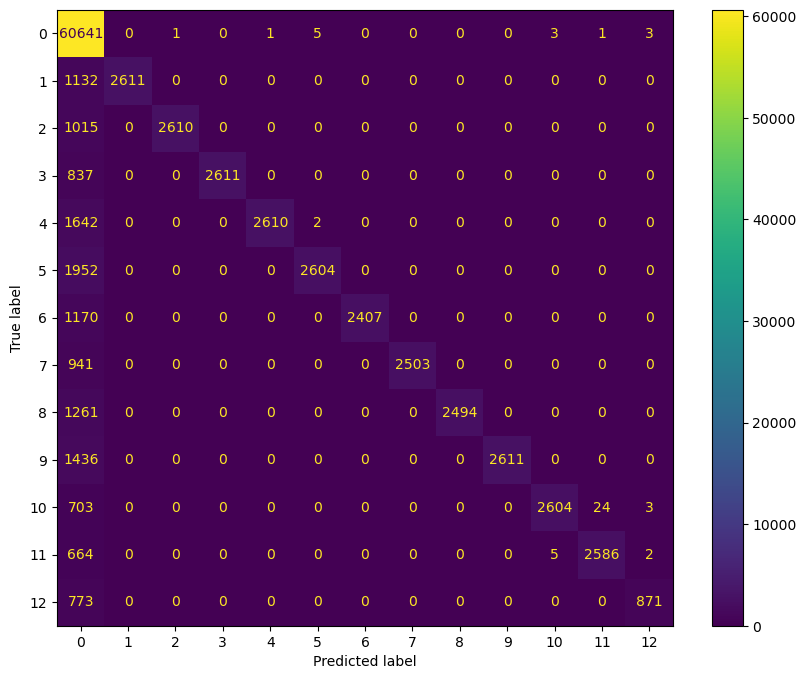

In [208]:
# confusion matrix
fig, ax = plt.subplots(figsize=(10,8))
metric=ConfusionMatrixDisplay.from_predictions(val_pred, sample_tar_val,ax=ax)
plt.show()

## Predictions on test data

In [213]:
## Test data
sample_inp_test=test.drop('label',axis=1)
sample_tar_test=test.label

In [214]:
## All classifiers
clf=[grid_xb_0,grid_xb_1,grid_xb_2,grid_xb_3,grid_xb_4,grid_xb_5,grid_xb_6,grid_xb_7,grid_xb_8,grid_xb_9,grid_xb_10,grid_xb_11,grid_xb_12]
predictions_prob_test=pd.DataFrame() ## empty data frmae to store all the probability of all classifiers 
for i in range(len(clf)):
    predictions_prob_test[i]=clf[i].predict_proba(sample_inp_test)[:,1]  ## predicting probabilities
test_pred = predictions_prob_test.idxmax(axis=1)  ##classifying based on probability

In [215]:
## Score
print('Test Accuracy :',accuracy_score(test_pred, sample_tar_test))
print(classification_report(test_pred, sample_tar_test))

Test Accuracy : 0.8673298165187923
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    106791
           1       1.00      0.70      0.83      6559
           2       1.00      0.71      0.83      6457
           3       1.00      0.75      0.86      6140
           4       1.00      0.61      0.76      7536
           5       1.00      0.58      0.74      7882
           6       1.00      0.66      0.80      6390
           7       1.00      0.73      0.84      6050
           8       1.00      0.66      0.80      6664
           9       1.00      0.65      0.78      7134
          10       1.00      0.78      0.88      5886
          11       0.99      0.77      0.87      5892
          12       0.99      0.52      0.68      2981

    accuracy                           0.87    182362
   macro avg       0.98      0.70      0.81    182362
weighted avg       0.89      0.87      0.86    182362



So when i combine all 13 induvidual models to predict target variable the accuracy of this induvidual model are close to 87 % which means this approach is performance is little bit low than other 2 approaches 

# Performance of all 3 Approaches

**XG Boost**

In [231]:
## Test data predictions
y_test_pred_gb = grid_search_main.predict(X_test)
print(classification_report(y_test, y_test_pred_gb)) ##Classification report

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     87172
           1       0.88      0.96      0.92      3076
           2       0.84      0.95      0.90      3065
           3       0.86      0.98      0.92      3141
           4       0.85      0.94      0.89      3092
           5       0.92      0.88      0.90      3072
           6       0.89      0.95      0.92      2725
           7       0.88      0.96      0.92      3046
           8       0.88      0.94      0.91      2926
           9       0.87      0.96      0.91      3105
          10       0.86      0.95      0.90      3112
          11       0.87      0.94      0.91      3054
          12       0.83      0.80      0.81       989

    accuracy                           0.94    121575
   macro avg       0.88      0.94      0.90    121575
weighted avg       0.95      0.94      0.95    121575



In [232]:
## Scores
acc=accuracy_score(y_test_pred_gb, y_test)
report_basic_model=classification_report(y_test, y_test_pred_gb,output_dict=True)
weighted_avg_precision = report_basic_model['weighted avg']['precision']
weighted_avg_recall = report_basic_model['weighted avg']['recall']
weighted_avg_f1score = report_basic_model['weighted avg']['f1-score']
Basic_xgb=[acc,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1score]

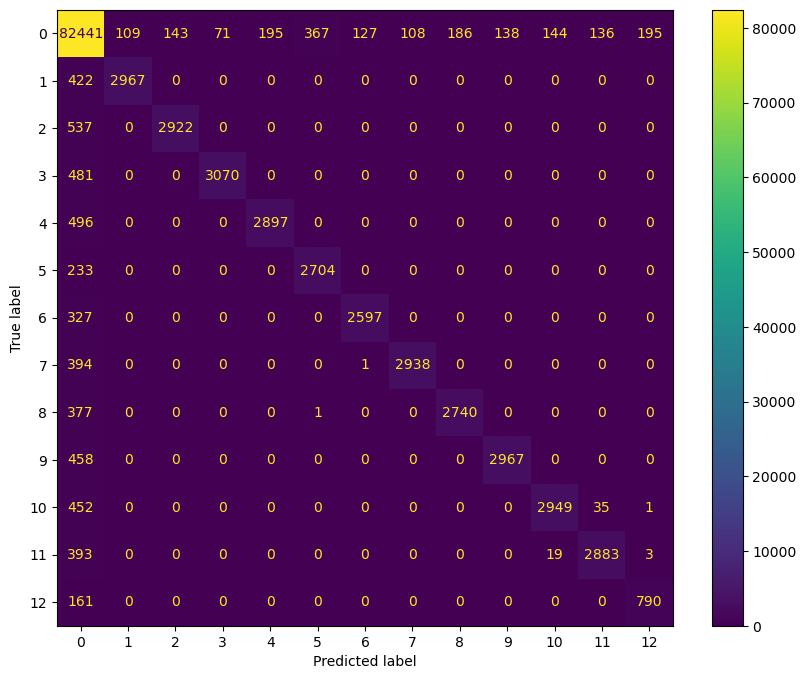

In [240]:
## Confusion metric
fig, ax = plt.subplots(figsize=(10,8))
ConfusionMatrixDisplay.from_predictions(y_test_pred_gb, y_test,ax=ax)
plt.show()

**OVR(One VS Rest Classifier)**

In [234]:
pred_test_ovr = pd.DataFrame(ovr.predict(X_test_new))  ## Test data predictions
print(classification_report(y_test_new, pred_test_ovr))  ## Classification report

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     87172
           1       0.91      0.96      0.94      3076
           2       0.86      0.93      0.90      3065
           3       0.88      0.96      0.92      3141
           4       0.92      0.96      0.94      3092
           5       0.98      0.98      0.98      3072
           6       0.96      0.98      0.97      2725
           7       0.94      0.98      0.96      3046
           8       0.96      0.98      0.97      2926
           9       0.92      0.97      0.95      3105
          10       0.90      0.95      0.92      3112
          11       0.92      0.95      0.93      3054
          12       0.89      0.86      0.88       989

   micro avg       0.96      0.95      0.95    121575
   macro avg       0.92      0.96      0.94    121575
weighted avg       0.96      0.95      0.95    121575
 samples avg       0.94      0.95      0.94    121575



In [235]:
## Scores
acc=accuracy_score(y_test_new, pred_test_ovr)
report_ovr_model=classification_report(y_test_new, pred_test_ovr,output_dict=True)
weighted_avg_precision = report_ovr_model['weighted avg']['precision']
weighted_avg_recall = report_ovr_model['weighted avg']['recall']
weighted_avg_f1score = report_ovr_model['weighted avg']['f1-score']
OVR=[acc,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1score]

**Individual Models**

In [246]:
## Test data
sample_inp=test.drop('label',axis=1)
sample_tar=test.label
##predictions
predictions_prob=pd.DataFrame()
for i in range(len(clf)):
    predictions_prob[i]=clf[i].predict_proba(sample_inp)[:,1]
test_pred = predictions_prob.idxmax(axis=1)
print(classification_report(test_pred, sample_tar))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    106791
           1       1.00      0.70      0.83      6559
           2       1.00      0.71      0.83      6457
           3       1.00      0.75      0.86      6140
           4       1.00      0.61      0.76      7536
           5       1.00      0.58      0.74      7882
           6       1.00      0.66      0.80      6390
           7       1.00      0.73      0.84      6050
           8       1.00      0.66      0.80      6664
           9       1.00      0.65      0.78      7134
          10       1.00      0.78      0.88      5886
          11       0.99      0.77      0.87      5892
          12       0.99      0.52      0.68      2981

    accuracy                           0.87    182362
   macro avg       0.98      0.70      0.81    182362
weighted avg       0.89      0.87      0.86    182362



In [238]:
## Scores
acc=accuracy_score(test_pred, sample_tar)
report_ind_model=classification_report(test_pred, sample_tar,output_dict=True)
weighted_avg_precision = report_ind_model['weighted avg']['precision']
weighted_avg_recall = report_ind_model['weighted avg']['recall']
weighted_avg_f1score = report_ind_model['weighted avg']['f1-score']
ind_model=[acc,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1score]

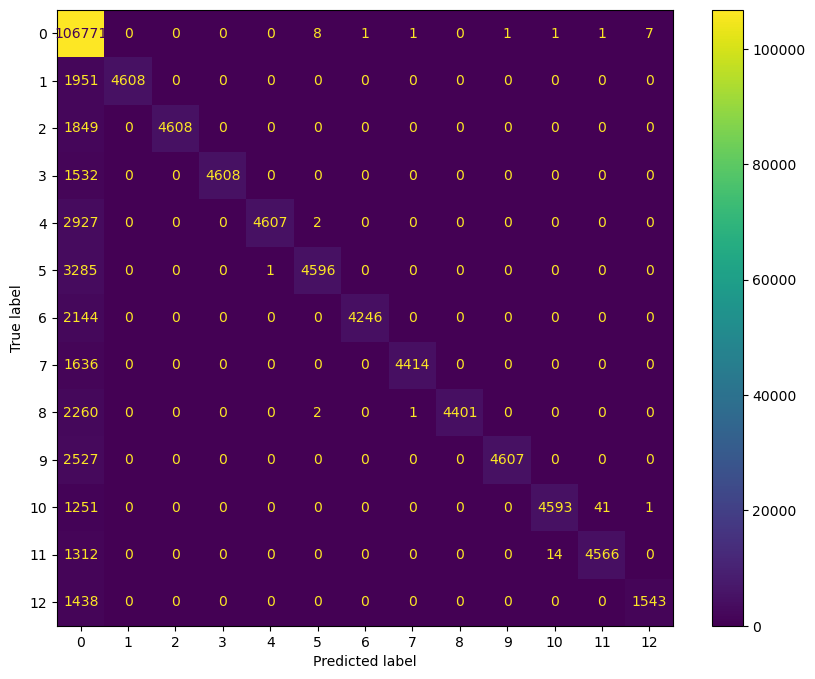

In [239]:
## Confusion metric
fig, ax = plt.subplots(figsize=(10,8))
metric=ConfusionMatrixDisplay.from_predictions(test_pred, sample_tar,ax=ax)
plt.show()

In [242]:
## Empty data frame
score=pd.DataFrame(columns=['Accuracy','Weighted Precision','Weighted Recall','Weighted F1-score'])

In [243]:
##Dumping data into data frame
score.loc['Xgboost'] = Basic_xgb
score.loc['OVR'] = OVR
score.loc['Individual models'] = ind_model

In [244]:
score  ## All 3 approaches scores

,Accuracy,Weighted Precision,Weighted Recall,Weighted F1-score
Xgboost,0.944808,0.947421,0.944808,0.945399
OVR,0.927123,0.956606,0.946033,0.950970
Individual models,0.867330,0.891481,0.867330,0.860557


# Conclusion
So from the score data frame we can see that the induvidual models has less performance compared to basic XGBosst and OVR classifier.Both XG boost and OVR(One Vs Rest classifier) has performed well both has precision recall and f1 score of 95%. So we can choose either Xg boost or OVR. So from the above confusion metric we can see that the only problem in classifying was with class 0 rest of the classes are classifying properly. As class 0 means no activity, People might be doing something even they are sitting quietly that might be reason for more erros and also Tunning further might imporve the performane of the model.

As i choose ensemble models , These models are black box models which means we only get the predictions and also from the feature importance we can see that every sensor data is contributing to classify the target variable apart from that we get nothing from these models.